# Preparing the data

In [1]:
import pandas as pd
import random
df = pd.read_csv("data/energy_dataset.csv", na_values='NA') #loading the csv dataset 


In [2]:
#trimming the dataset with just the timestamp and the 'price value' columns 
columns_to_keep = [df.columns[0], df.columns[-1]] 
df = df[columns_to_keep]

#converting the time col to string and then trimming that col into 2 different columns 
# 1. Year-Month
# 2. Day(01-31)
df['time'] = df['time'].astype(str)
df['Year-Month'] = df['time'].str[:7]
df['Day'] = df['time'].str[8:10]
col = [df.columns[1], df.columns[2], df.columns[-1]]
df = df[col]

#converting the dataframe into a set to get rid of the duplicates and then reconverting it to a dataframe
df_set = set(map(tuple, df.to_records(index=False)))
recreated_df = pd.DataFrame(list(df_set), columns=df.columns)
recreated_df1 = recreated_df.groupby(['Year-Month', 'Day']).agg({'price actual': 'mean'}).reset_index()

#pivoting the dataframe in sucha way that the Year-Month are the rows and the Days (01-31) are the columns with price values as the datavalues
pivoted_df = recreated_df1.pivot(index='Year-Month', columns='Day', values='price actual')
df = pivoted_df
df

Day,01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
Year-Month,,,,,,,,,,,,,,,,,,,,,
2015-01,62.148750,69.327083,65.706667,58.264167,74.568750,68.855417,78.775833,78.810417,76.598333,68.272500,...,63.945000,66.746250,58.130000,53.517083,70.522083,68.084167,71.007391,57.161250,46.515000,31.167500
2015-02,31.626250,62.244583,56.500000,53.757917,56.560000,60.888333,66.255000,53.650417,65.583333,73.359167,...,31.283750,44.846250,41.637083,48.607826,54.505000,53.816087,47.107917,NaN,NaN,NaN
2015-03,39.541667,56.295000,66.383750,47.649565,40.747083,60.835833,57.438750,51.822083,58.297500,64.659167,...,53.136667,65.950417,57.498333,54.272500,56.178261,57.610833,56.048750,46.069545,55.318333,55.614583
2015-04,43.440833,51.768750,53.404167,40.550833,38.687917,52.682083,58.325000,53.240833,62.929583,67.219167,...,61.939167,73.042500,69.632609,59.555000,50.185417,56.367083,68.067500,71.206957,65.714783,NaN
2015-05,55.008261,55.690833,55.097500,58.728333,56.602609,71.615217,61.300833,51.276667,63.392174,54.783750,...,55.940000,47.344583,45.460000,59.989583,58.546087,59.654167,63.398333,65.186250,60.353913,58.758333
2015-06,66.370000,66.528750,65.924348,66.899167,66.434583,58.446667,57.709565,67.260417,67.273333,67.028333,...,73.036087,70.981667,71.663043,73.432917,74.385217,65.532083,60.432917,72.537826,71.684583,NaN
2015-07,71.577083,75.644583,72.085833,65.303043,60.744583,71.715000,73.080833,71.505000,71.729167,74.590870,...,75.948333,76.162500,72.007083,61.741250,59.641250,73.444167,74.845417,73.757917,70.086667,68.734167
2015-08,61.898333,55.418696,69.542917,68.915833,69.540455,70.752500,70.497917,63.786667,56.373333,68.510417,...,61.698750,44.125833,62.021250,68.275000,62.956667,59.720435,67.940833,60.342083,55.945000,71.102083
2015-09,66.340000,65.799167,62.697500,63.270833,59.870000,59.852083,67.875833,69.578750,68.887917,67.240833,...,57.151667,58.152083,60.351667,60.671304,58.398750,54.837083,59.830417,61.843750,63.747391,NaN


In [3]:
# Using fillna function of dataframe to fill the NAN values with the mean of the columns 
for column in df.columns:
    column_mean = df[column].mean()
    df[column].fillna(column_mean, inplace=True)
df.head()

Day,01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
Year-Month,,,,,,,,,,,,,,,,,,,,,
2015-01,62.148750,69.327083,65.706667,58.264167,74.568750,68.855417,78.775833,78.810417,76.598333,68.272500,...,63.945000,66.746250,58.130000,53.517083,70.522083,68.084167,71.007391,57.161250,46.515000,31.167500
2015-02,31.626250,62.244583,56.500000,53.757917,56.560000,60.888333,66.255000,53.650417,65.583333,73.359167,...,31.283750,44.846250,41.637083,48.607826,54.505000,53.816087,47.107917,57.801804,57.292914,56.063964
2015-03,39.541667,56.295000,66.383750,47.649565,40.747083,60.835833,57.438750,51.822083,58.297500,64.659167,...,53.136667,65.950417,57.498333,54.272500,56.178261,57.610833,56.048750,46.069545,55.318333,55.614583
2015-04,43.440833,51.768750,53.404167,40.550833,38.687917,52.682083,58.325000,53.240833,62.929583,67.219167,...,61.939167,73.042500,69.632609,59.555000,50.185417,56.367083,68.067500,71.206957,65.714783,56.063964
2015-05,55.008261,55.690833,55.097500,58.728333,56.602609,71.615217,61.300833,51.276667,63.392174,54.783750,...,55.940000,47.344583,45.460000,59.989583,58.546087,59.654167,63.398333,65.186250,60.353913,58.758333


Text(0.5, 1.0, 'Line plot of every 11th day of each month ')

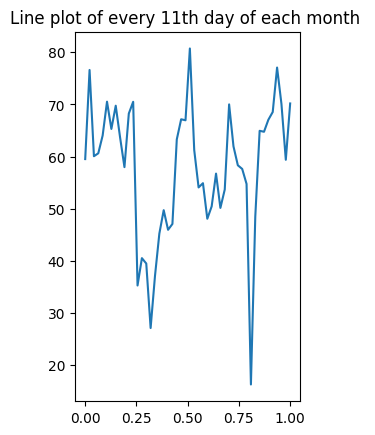

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(1,2,2)
plt.plot(np.linspace(0, 1, len(df['11'])), df['11'])
plt.title('Line plot of every 11th day of each month ')

# Calculation
get the parameter using fit function

In [5]:
from scipy.stats import skewnorm
from scipy import stats
# we are calcuate the data from every 11th day of every month, like 01-11-2015, 03-11-2018 etc.
data = df['11']
a, loc, scale = skewnorm.fit(data)
a,loc,scale

(-3.7015135127229897, 72.96270461085724, 19.979421261023774)

calculate the mean, standard deviation, and skewness manully

In [6]:
df_mean_mom = data.mean()
df_var_mom = data.var()
df_std_mom = data.std()
df_skew_mom = np.mean((data - df_mean_mom) / df_std_mom**3)
df_skew_mom, df_mean_mom, df_std_mom

(2.6020852139652106e-18, 57.72767028299297, 13.062343468700638)

# Visualization 

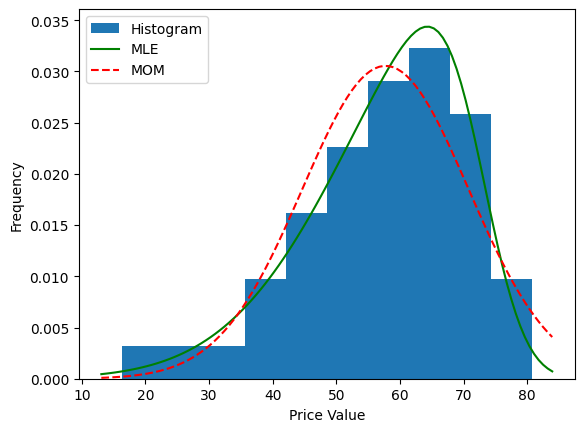

In [7]:
# show the histogram
plt.hist(data, density=True, bins=10, label='Histogram')

# Fitting a the normal distribution with right skewness as the basic normal distribution was not fitting perfectly
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# use the data we get from fit function
pdf_MLE = skewnorm.pdf(x, a, loc, scale)

# Using the data we get from manual calculation
pdf_MOM = skewnorm.pdf(x, df_skew_mom, df_mean_mom, df_std_mom)

# Overlay the PDF curve
plt.plot(x, pdf_MLE, 'g', label='MLE')
plt.plot(x, pdf_MOM, 'r--', label='MOM')

plt.xlabel('Price Value')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

# Conclusion 

Base on the graph we can tell the MLE line fitts better on our graph than MOM line. Therefore, we can tell MLE is a better method make a model.